# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, we will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, we will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [37]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [5]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [7]:
#this code display the missing values with counts and data type in the columns
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ResponseId
ResponseId
False    65437
Name: count, dtype: int64

MainBranch
MainBranch
False    65437
Name: count, dtype: int64

Age
Age
False    65437
Name: count, dtype: int64

Employment
Employment
False    65437
Name: count, dtype: int64

RemoteWork
RemoteWork
False    54806
True     10631
Name: count, dtype: int64

Check
Check
False    65437
Name: count, dtype: int64

CodingActivities
CodingActivities
False    54466
True     10971
Name: count, dtype: int64

EdLevel
EdLevel
False    60784
True      4653
Name: count, dtype: int64

LearnCode
LearnCode
False    60488
True      4949
Name: count, dtype: int64

LearnCodeOnline
LearnCodeOnline
False    49237
True     16200
Name: count, dtype: int64

TechDoc
TechDoc
False    40897
True     24540
Name: count, dtype: int64

YearsCode
YearsCode
False    59869
True      5568
Name: count, dtype: int64

YearsCodePro
YearsCodePro
False    51610
True     13827
Name: count, dtype: int64

DevType
DevType
False    59445
True      5992
Name: count, dty

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [8]:
# statistical description of the numerical columns
#print(df.describe(include='object')) if wanted to include non numerical data as well
print(f'The basic statistical description of numeric columns are:', df.describe())

The basic statistical description of numeric columns are:          ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000

### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [29]:
#remove any extra white spaces
df['Country'] = df['Country'].str.strip()

In [30]:
# Write your code here
column_to_check = 'Country'

if column_to_check in df.columns:
    print(f"\nUnique values and their counts for '{column_to_check}':")
    # Display the top 50 unique values and their counts to quickly spot common inconsistencies.
    # we might need to adjust .head() based on the diversity of your data.
    print(df[column_to_check].value_counts().sort_values(ascending=False))


Unique values and their counts for 'Country':
Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64


<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [31]:
## Write your code here
##first the country column data looks fine however there are some missing values in country column so we are going to remove them.
df['Country'].isnull().sum()

np.int64(6507)

In [63]:
df.dropna(subset=['Country'], inplace=True)
rows_after_country_drop = df.shape[0]
rows_after_country_drop

58930

In [38]:
df['EdLevel'].isnull().sum()

np.int64(4653)

In [41]:
df.dropna(subset=['EdLevel'], inplace=True)

In [44]:
df['EdLevel'].isnull().sum()

np.int64(0)

In [45]:
df['EdLevel'].value_counts().head(50)

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64

In [51]:
df['EdLevel'].count()

np.int64(60784)

In [47]:
import numpy as np

In [54]:
#now let's map for EdLevel into consistent format
column_to_check_edlevel = 'EdLevel'
df[column_to_check_edlevel] = df[column_to_check_edlevel].astype(str).str.strip()

edlevel_mapping = {
        'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s',
        'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s',
        'Some college/university study without earning a degree': 'College without Degree',
        'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary School',
        'Professional degree (JD, MD, Ph.D, Ed.D, etc.)':'Professional Degree',
        'Associate degree (A.A., A.S., etc.)': 'Associate Degree',
        'Primary/elementary school': 'Primary School',
        'Something else': 'Something Else',
        'nan': np.nan, # Ensure 'nan' string is also treated as NaN
        'NA' : np.nan
    }
df[column_to_check_edlevel] = df[column_to_check_edlevel].replace(edlevel_mapping)
  
print(f"\n--- Checking and Cleaning 'EdLevel' Column ---")
#Check how many rows are in 'EdLevel' column (non-null count)
edlevel_non_null_count = df[column_to_check_edlevel].count()
print(f"Number of non-null rows in '{column_to_check_edlevel}' column: {edlevel_non_null_count}")
df[column_to_check_edlevel].value_counts().head(10)


--- Checking and Cleaning 'EdLevel' Column ---
Number of non-null rows in 'EdLevel' column: 60784


EdLevel
Bachelor’s                24942
Master’s                  15557
College without Degree     7651
Secondary School           5793
Professional Degree        2970
Associate Degree           1793
Primary School             1146
Something Else              932
Name: count, dtype: int64

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [56]:
import re
column_to_encode_employment = 'Employment'
# Split the 'Employment' column by semicolon and clean up whitespace
# Then explode to get one row per individual employment type
employment_series = df[column_to_encode_employment].astype(str).str.split(';').explode().str.strip()

# Get all unique employment types
unique_employment_types = employment_series.unique()
print(f"\nIdentified unique employment types: {unique_employment_types.tolist()}")

# Create new one-hot encoded columns
for emp_type in unique_employment_types:
    # Create a new column for each employment type
    # Check if the original (cleaned) 'Employment' string contains the specific type
    # Use a regex pattern for 'in' check to ensure exact match and avoid partial matches
    # e.g., 'Employed' matching 'Employed, full-time'    
    pattern = r'\b' + re.escape(emp_type) + r'\b'
    df[f'Employment_{emp_type.replace(" ", "_").replace(",", "").replace("-", "_").replace("/", "_")}'] = \
    df[column_to_encode_employment].apply(lambda x: 1 if re.search(pattern, x) else 0)

    # Display the first few rows with the new one-hot encoded columns
    print(f"\nFirst 5 rows of DataFrame with new one-hot encoded '{column_to_encode_employment}' columns:")
    # Dynamically select the new columns based on unique_employment_types
new_emp_cols = [f'Employment_{emp_type.replace(" ", "_").replace(",", "").replace("-", "_").replace("/", "_")}' for emp_type in unique_employment_types]
print(df[[column_to_encode_employment] + new_emp_cols].head())

    # Display the full DataFrame to show the new columns
print("\nFull DataFrame with one-hot encoded columns:")
print(df[column_to_encode_employment])


Identified unique employment types: ['Employed, full-time', 'Student, full-time', 'Not employed, but looking for work', 'Independent contractor, freelancer, or self-employed', 'Not employed, and not looking for work', 'Student, part-time', 'Employed, part-time', 'I prefer not to say', 'Retired']

First 5 rows of DataFrame with new one-hot encoded 'Employment' columns:

First 5 rows of DataFrame with new one-hot encoded 'Employment' columns:

First 5 rows of DataFrame with new one-hot encoded 'Employment' columns:

First 5 rows of DataFrame with new one-hot encoded 'Employment' columns:

First 5 rows of DataFrame with new one-hot encoded 'Employment' columns:

First 5 rows of DataFrame with new one-hot encoded 'Employment' columns:

First 5 rows of DataFrame with new one-hot encoded 'Employment' columns:

First 5 rows of DataFrame with new one-hot encoded 'Employment' columns:

First 5 rows of DataFrame with new one-hot encoded 'Employment' columns:
            Employment  Employment_E

In [58]:
df[column_to_encode_employment].value_counts().head(50)

Employment
Employed, full-time                                                                                                                                                                                                     36525
Independent contractor, freelancer, or self-employed                                                                                                                                                                     4534
Student, full-time                                                                                                                                                                                                       4242
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                                 3346
Not employed, but looking for work                                                                   

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [64]:
## it will be easier if we calculate % of missing values to compare which column has higherst missing values.
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
for column_name, percentage in missing_percentage_sorted.items():
    print(f"Column: {column_name}")
    print(f"Missing Percentage: {percentage:.2f}%")
    print("")


Column: AINextMuch less integrated
Missing Percentage: 98.18%

Column: AINextLess integrated
Missing Percentage: 96.17%

Column: AINextNo change
Missing Percentage: 79.33%

Column: AINextMuch more integrated
Missing Percentage: 77.83%

Column: EmbeddedAdmired
Missing Percentage: 72.18%

Column: EmbeddedWantToWorkWith
Missing Percentage: 70.75%

Column: EmbeddedHaveWorkedWith
Missing Percentage: 63.21%

Column: ConvertedCompYearly
Missing Percentage: 60.23%

Column: AIToolNot interested in Using
Missing Percentage: 59.91%

Column: AINextMore integrated
Missing Percentage: 59.60%

Column: Knowledge_9
Missing Percentage: 53.11%

Column: Frequency_3
Missing Percentage: 52.98%

Column: Knowledge_8
Missing Percentage: 52.90%

Column: ProfessionalTech
Missing Percentage: 52.89%

Column: Knowledge_7
Missing Percentage: 52.86%

Column: Knowledge_6
Missing Percentage: 52.72%

Column: Knowledge_5
Missing Percentage: 52.69%

Column: Knowledge_2
Missing Percentage: 52.45%

Column: Knowledge_4
Missi

<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [65]:
## let's first find the average i.e mean value for the column
avg_conv_comp_yearly = df['ConvertedCompYearly'].astype("float").mean(axis=0)
avg_conv_comp_yearly

np.float64(86155.28726264134)

In [66]:
#now lets fill the missing values in ConvertedCompYearly which has 60.23% of missing values
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].replace(np.nan, avg_conv_comp_yearly)
df['ConvertedCompYearly'].value_counts().head(15)

ConvertedCompYearly
86155.287263     35495
64444.000000       321
53703.000000       308
75184.000000       230
85925.000000       226
107406.000000      208
150000.000000      207
120000.000000      203
200000.000000      196
42962.000000       190
48333.000000       178
100000.000000      176
59073.000000       164
32222.000000       162
69814.000000       162
Name: count, dtype: int64

<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [68]:
#let's check how many missing values in remote work ?
df['RemoteWork'].isnull().sum()

np.int64(9440)

In [76]:
#As we can see above the missing % in remote work is 16.02% so we are going to fill the missing values with mode i.e most frequent values.
# Find the most frequent (mode) value
most_frequent = df['RemoteWork'].mode()[0]
# Replace missing values (NaN) with the mode
df['RemoteWork'] = df['RemoteWork'].fillna(most_frequent)
df['RemoteWork'].isnull().sum()
df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    30299
Remote                                  19165
In-person                                9466
Name: count, dtype: int64

### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [77]:
## Write your code here
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [80]:
df['ConvertedCompYearly'].isnull().sum()

np.int64(0)

In [78]:
#normalise the the column and create a new column 
min_max_scaler = MinMaxScaler()
# Reshape the data for the scaler (it expects a 2D array)
df['ConvertedCompYearly_MinMax'] = min_max_scaler.fit_transform(df[['ConvertedCompYearly']])
print("\n5. 'ConvertedCompYearly' normalized using Min-Max Scaling. New column: 'ConvertedCompYearly_MinMax'")
print(f"   Min-Max Scaled values range: {df['ConvertedCompYearly_MinMax'].min():.4f} to {df['ConvertedCompYearly_MinMax'].max():.4f}")


5. 'ConvertedCompYearly' normalized using Min-Max Scaling. New column: 'ConvertedCompYearly_MinMax'
   Min-Max Scaled values range: 0.0000 to 1.0000


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\upbim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\upbim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


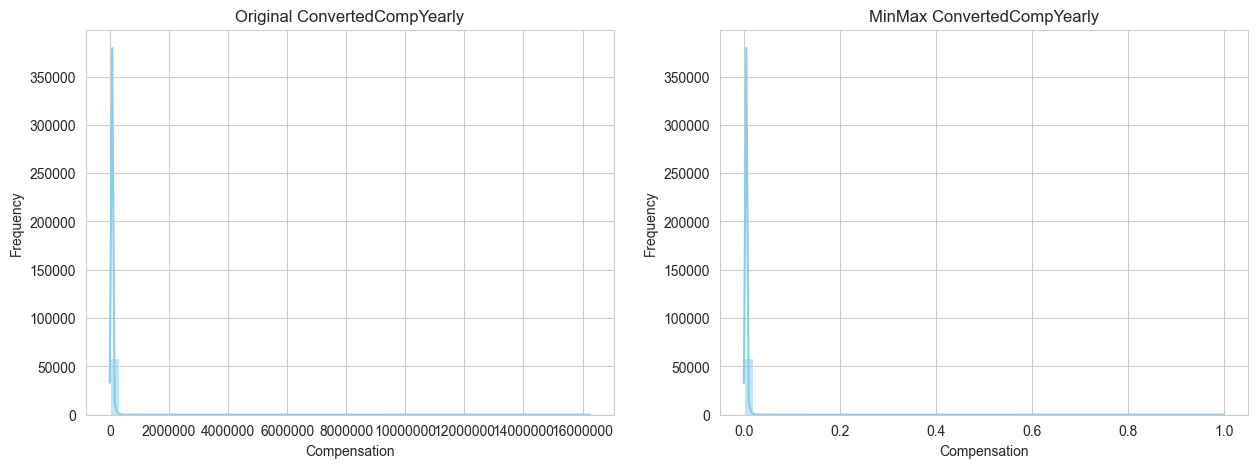

In [88]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['ConvertedCompYearly'], kde=True, color='skyblue', bins=50)
plt.title('Original ConvertedCompYearly')
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1, 2, 2)
sns.histplot(df['ConvertedCompYearly_MinMax'], kde=True, color='skyblue', bins=50)
plt.title('MinMax ConvertedCompYearly')
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [89]:
#transforming the ConvertedCompYearly into log to reduce skewness
df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly'])
print("\n'ConvertedCompYearly' has been log-transformed. New column: 'ConvertedCompYearly_Log'")
print(f"Log-transformed Min-Max Scaled values range: {df['ConvertedCompYearly_MinMax_Log'].min():.4f} to {df['ConvertedCompYearly_MinMax_Log'].max():.4f}")



'ConvertedCompYearly' has been log-transformed. New column: 'ConvertedCompYearly_Log'
Log-transformed Min-Max Scaled values range: 0.6931 to 16.6040


C:\Users\upbim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\upbim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\upbim\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


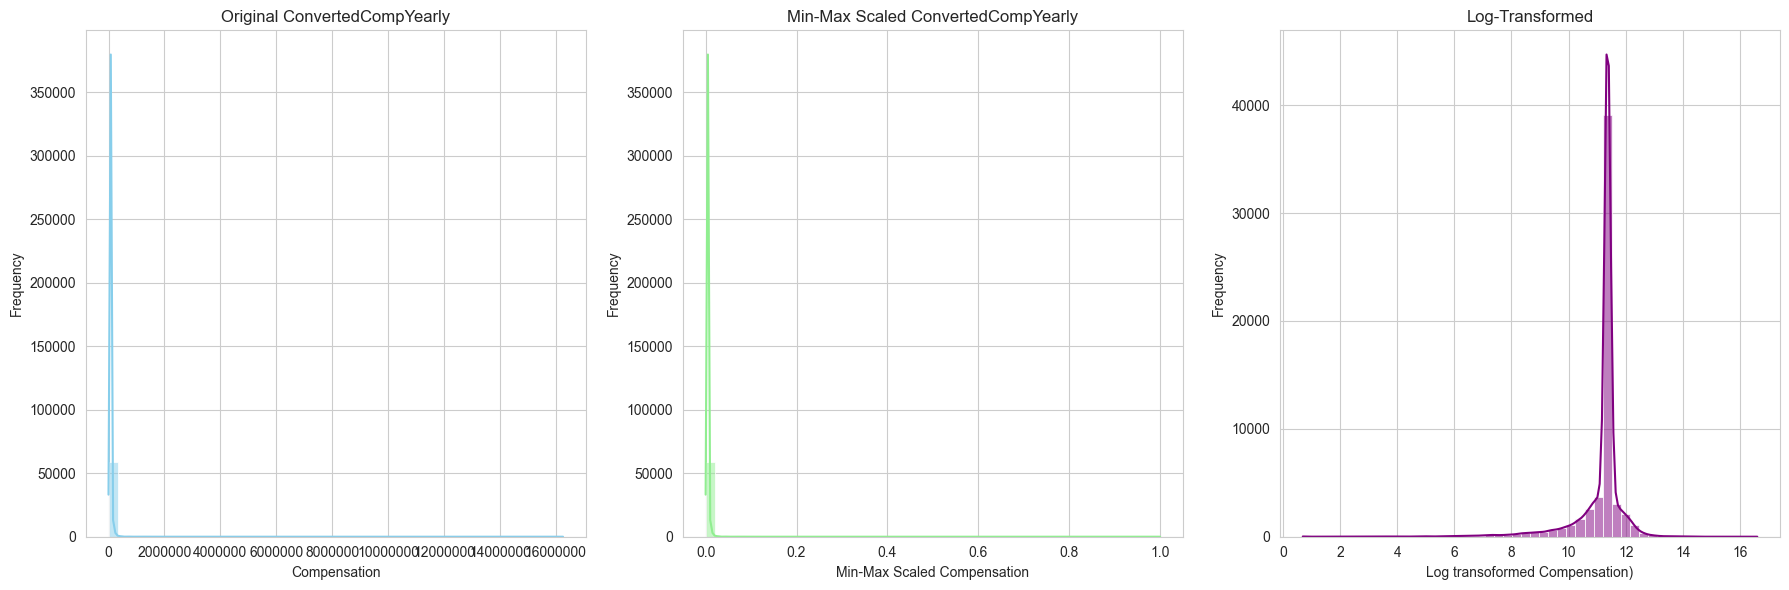

In [91]:
plt.figure(figsize=(18, 6)) # Adjusted figure size for 3 plots
sns.set_style("whitegrid")

plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.histplot(df['ConvertedCompYearly'], kde=True, color='skyblue', bins=50)
plt.title('Original ConvertedCompYearly')
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.histplot(df['ConvertedCompYearly_MinMax'], kde=True, color='lightgreen', bins=50)
plt.title('Min-Max Scaled ConvertedCompYearly')
plt.xlabel('Min-Max Scaled Compensation')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.histplot(df['ConvertedCompYearly_Log'], kde=True, color='purple', bins=50)
plt.title('Log-Transformed')
plt.xlabel('Log transoformed Compensation)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [92]:
## first lets see the null values and fill with median values
df['YearsCodePro'].isnull().sum()

np.int64(8536)

In [95]:
#filling the null values with median values
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
median_years_code_pro = df['YearsCodePro'].median()
df['YearsCodePro'].fillna(median_years_code_pro, inplace=True)

C:\Users\upbim\AppData\Local\Temp\ipykernel_5964\2233897704.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].fillna(median_years_code_pro, inplace=True)


In [96]:
df['YearsCodePro'].isnull().sum()

np.int64(0)

In [100]:
#now lets do some binning and create new column ExperienceLevel
#setting realistic year for more than 50 years
column_years_code_pro = 'YearsCodePro'
max_realistic_years = 51
df[column_years_code_pro] = df[column_years_code_pro].replace('More than 50 years', str(max_realistic_years))
initial_outliers_count = df[df[column_years_code_pro] > max_realistic_years].shape[0]
df[column_years_code_pro] = df[column_years_code_pro].apply(lambda x: min(x, max_realistic_years))
if initial_outliers_count > 0:
    print(f"Capped {initial_outliers_count} outlier values in '{column_years_code_pro}' to a maximum of {max_realistic_years} years.")

# Define bins and labels for experience levels
bins = [-1, 2, 7, 15, max_realistic_years + 1] # -1 to include 0 years, max_realistic_years + 1 to include capped max
labels = ['Entry-level (0-2 years)', 'Mid-level (3-7 years)', 'Senior (8-15 years)', 'Expert (16+ years)']

    # Create the 'ExperienceLevel' column
df['ExperienceLevel'] = pd.cut(df[column_years_code_pro], bins=bins, labels=labels, right=True)
df['ExperienceLevel'].iloc[20:40] #to visualise specific range of data use iloc[startingrow:endingrow]


20        Senior (8-15 years)
21        Senior (8-15 years)
22         Expert (16+ years)
23         Expert (16+ years)
24        Senior (8-15 years)
25         Expert (16+ years)
26         Expert (16+ years)
27      Mid-level (3-7 years)
28        Senior (8-15 years)
29      Mid-level (3-7 years)
30    Entry-level (0-2 years)
31      Mid-level (3-7 years)
32      Mid-level (3-7 years)
33         Expert (16+ years)
34        Senior (8-15 years)
35      Mid-level (3-7 years)
36        Senior (8-15 years)
37      Mid-level (3-7 years)
38      Mid-level (3-7 years)
39        Senior (8-15 years)
Name: ExperienceLevel, dtype: category
Categories (4, object): ['Entry-level (0-2 years)' < 'Mid-level (3-7 years)' < 'Senior (8-15 years)' < 'Expert (16+ years)']

### Summary


In this lab, we:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


<h5>This lab is done by Bimal Upadhaya &copy 2025</h5>